In [1]:
#Assignment 1: Handling Missing Data in a Healthcare Dataset
#Objective:
#To analyze and clean a healthcare dataset by identifying and handling missing values using various imputation techniques.

#Instructions:
#Dataset Exploration:
    #Load the provided healthcare dataset.
    #Perform an initial exploratory data analysis (EDA) to understand the structure and missing values.

#Identify Missing Data:
   #Use methods such as isna() and info() in Pandas to identify missing values.
   #Calculate the percentage of missing values for each column.

#Analyze the Pattern of Missing Data:
    #Determine whether data is Missing Completely at Random (MCAR), Missing at Random (MAR), or Missing Not at Random (MNAR).
    #Use visualization techniques like heatmaps (seaborn.heatmap()) to analyze missing patterns.

#Impute Missing Values:
  #Use different imputation techniques:
      #Mean/Median/Mode imputation for numerical columns.
      #Mode imputation for categorical columns.
      #K-Nearest Neighbors (KNN) imputation.
      #Regression imputation (if applicable).
  #Compare the results of different imputation techniques.

#Evaluate the Effect of Imputation:
     #Perform statistical analysis (mean, standard deviation) before and after imputation.
     #Visualize the impact using boxplots or histograms.

#Report & Submission:	
     #Document the steps, analysis, and insights.
     #Provide a Jupyter Notebook with the implementation.


First few rows of the dataset:
   Patient_ID  Age  Gender  Blood_Pressure  Cholesterol Diabetes Heart_Disease
0           1   69    Male            95.0        122.0       No            No
1           2   32    Male           129.0        191.0       No            No
2           3   89  Female           101.0        214.0       No            No
3           4   78  Female           142.0        203.0       No            No
4           5   38    Male           160.0        217.0       No            No

Dataset structure and summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      505 non-null    int64  
 1   Age             505 non-null    int64  
 2   Gender          484 non-null    object 
 3   Blood_Pressure  475 non-null    float64
 4   Cholesterol     485 non-null    float64
 5   Diabetes        505 non-null    object 

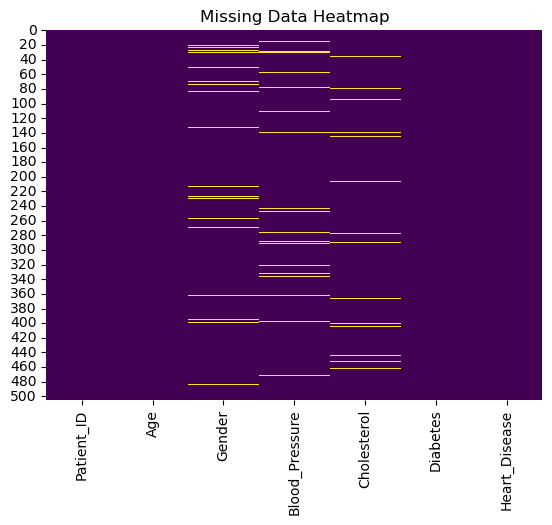


Statistics Before Imputation:
       Patient_ID         Age  Blood_Pressure  Cholesterol
count  505.000000  505.000000      475.000000   485.000000
mean   249.693069   52.918812      133.412632   200.470103
std    144.240508   21.064700       25.933424    58.533857
min      1.000000   18.000000       90.000000   101.000000
25%    126.000000   34.000000      111.000000   149.000000
50%    249.000000   52.000000      132.000000   207.000000
75%    374.000000   71.000000      155.000000   249.000000
max    500.000000   89.000000      179.000000   299.000000

Statistics After Imputation:
       Patient_ID         Age  Blood_Pressure  Cholesterol  Gender_Male  \
count  505.000000  505.000000      505.000000   505.000000   505.000000   
mean   249.693069   52.918812      133.412632   200.470103     0.504950   
std    144.240508   21.064700       25.149755    57.360715     0.500471   
min      1.000000   18.000000       90.000000   101.000000     0.000000   
25%    126.000000   34.000000    

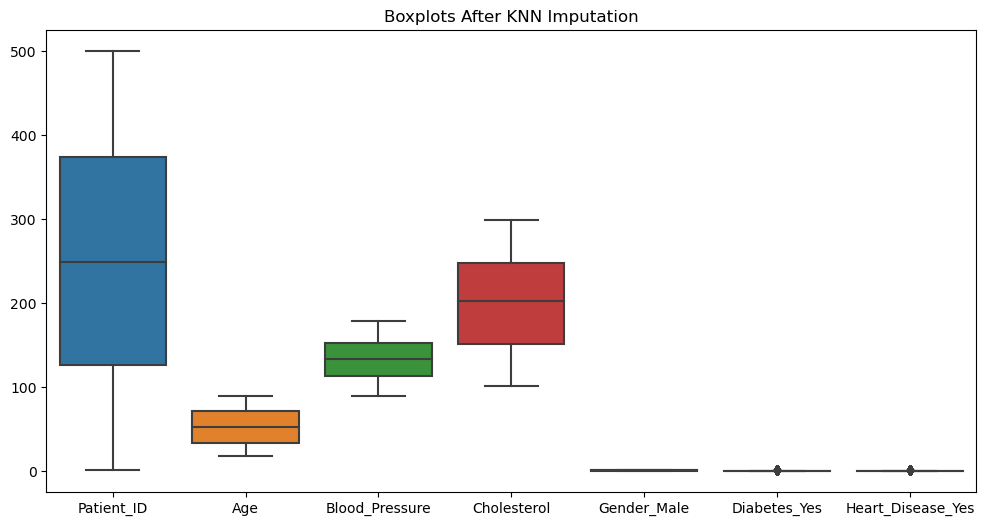

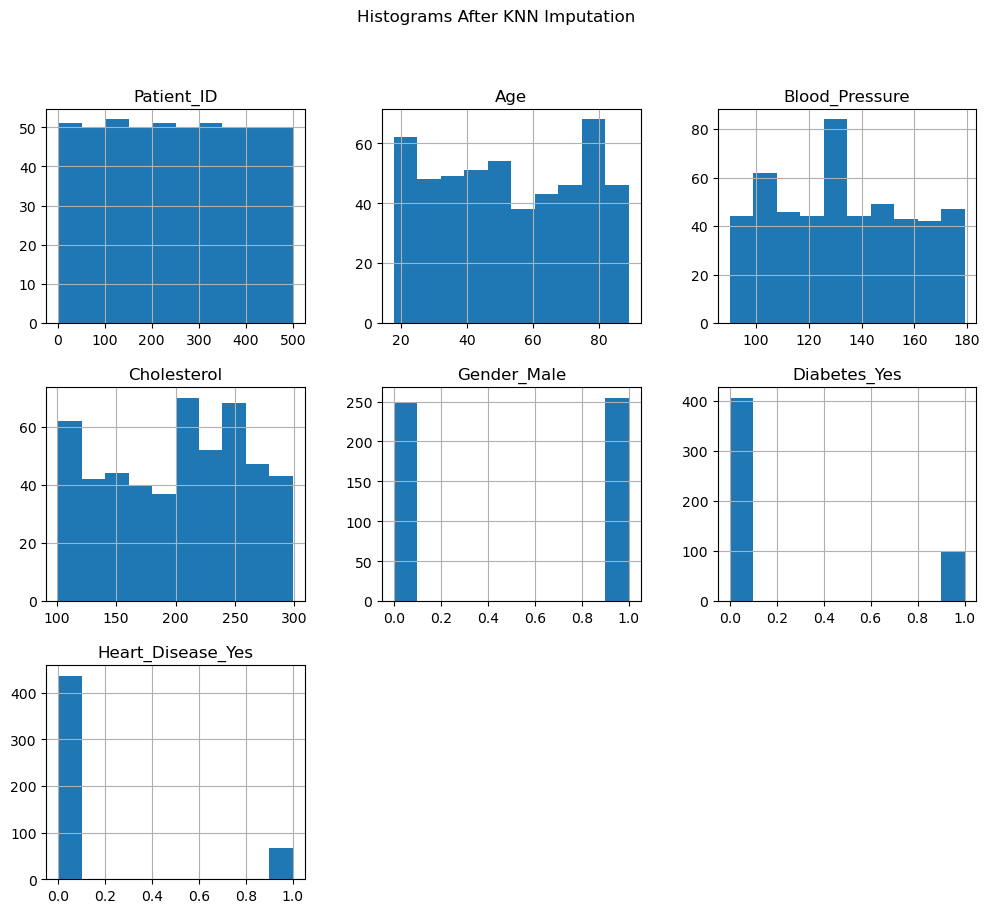

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression


file_path = r'C:\ML\Day_15_Healthcare_data.csv'
df = pd.read_csv(file_path)

# Initial Exploratory Data Analysis (EDA)
print("First few rows of the dataset:")
print(df.head())

print("\nDataset structure and summary:")
print(df.info())
print(df.describe())


print("\nMissing values in each column:")
missing_values = df.isna()
print(missing_values)

print("\nPercentage of missing values for each column:")
missing_percentage = df.isna().mean() * 100
print(missing_percentage)

# Analyze the Pattern of Missing Data
print("\nVisualizing missing data pattern:")
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# Impute Missing Values
# Convert categorical columns to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Gender', 'Diabetes', 'Heart_Disease'], drop_first=True)

# Mean/Median/Mode Imputation for Numerical Columns
df_encoded['Age'] = df_encoded['Age'].fillna(df_encoded['Age'].mean())
df_encoded['Blood_Pressure'] = df_encoded['Blood_Pressure'].fillna(df_encoded['Blood_Pressure'].mean())
df_encoded['Cholesterol'] = df_encoded['Cholesterol'].fillna(df_encoded['Cholesterol'].mean())

# K-Nearest Neighbors (KNN) Imputation
knn_imputer = KNNImputer(n_neighbors=5)
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_encoded), columns=df_encoded.columns)

# Regression Imputation (for Age column, as an example)
known_data = df_encoded[df_encoded['Age'].notna()]
unknown_data = df_encoded[df_encoded['Age'].isna()]

# Ensure there are no missing values in the columns used for regression
X_train = known_data.drop(columns=['Age']).fillna(df_encoded.mean())
y_train = known_data['Age']

# Check if X_train is empty
if not X_train.empty:
    # Train the regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict missing values
    X_pred = unknown_data.drop(columns=['Age']).fillna(df_encoded.mean())
    if not X_pred.empty:
        df_encoded.loc[df_encoded['Age'].isna(), 'Age'] = model.predict(X_pred)
else:
    print("No sufficient data to train the regression model.")

# Evaluate the Effect of Imputation
print("\nStatistics Before Imputation:")
print(df.describe())

print("\nStatistics After Imputation:")
print(df_knn_imputed.describe())

# Visualize the Impact Using Boxplots or Histograms
print("\nVisualizing the impact of imputation:")
# Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_knn_imputed)
plt.title('Boxplots After KNN Imputation')
plt.show()

# Histograms
df_knn_imputed.hist(figsize=(12, 10))
plt.suptitle('Histograms After KNN Imputation')
plt.show()
